In [86]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd
sys.path.append('../src')
import lcp
from sklearn.linear_model import LogisticRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# train 3 models

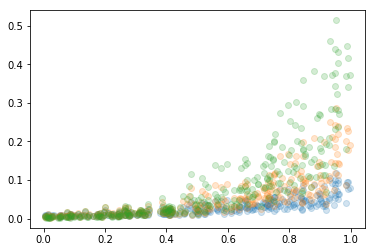

In [87]:
np.random.seed(13)
N = 300
p = 10
X = np.random.rand(N, p)
y = (X[:, 0] > 0.95).astype(np.int32)

models = []
for class_weight in [0.5, 1, 2]:
    m = LogisticRegression(solver='lbfgs', random_state=13, class_weight={0: 1, 1: class_weight})
    m.fit(X, y)
    plt.plot(X[:, 0], m.predict_proba(X)[:, 1], 'o', label=str(class_weight), alpha=0.2)
    models.append(deepcopy(m))

# model importances

In [88]:
np.random.seed(13)
x = np.random.rand(1, p)
feature_num = 0
class_num = 1

**get feature importances**

In [89]:
explainer = lcp.Explainer(X)
explainer.explain_instance(x, models[1].predict_proba, class_num, return_table=True)

,contribution_scores,sensitivity_pos_scores,sensitivity_neg_scores
2,-0.017,-0.050,0.050
6,-0.007,-0.056,0.056
8,-0.001,-0.004,0.004
5,0.002,-0.078,0.078
3,0.003,0.007,-0.007
7,0.005,0.022,-0.022
1,0.006,-0.026,0.026
9,0.011,0.050,-0.050
4,0.024,0.056,-0.056
0,0.038,0.320,-0.320


**visualize a particular feature locally**

contribution: 0.04, sensitivity pos: 0.32


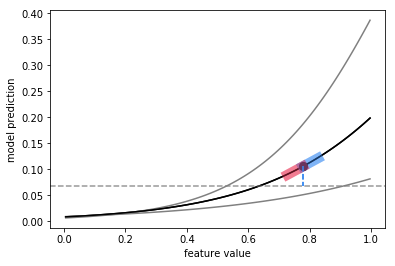

In [91]:
lcp.viz_expl(expl_dict, show=False)

ice_top = explainer.calc_ice_grid(x, models[0].predict_proba, feature_num)
ice_bot = explainer.calc_ice_grid(x, models[2].predict_proba, feature_num)

plt.plot(ice_top[0], ice_top[1][:, 1], color='gray')
plt.plot(ice_bot[0], ice_bot[1][:, 1], color='gray')
print(f'contribution: {expl_dict["contribution"]:0.2f}, sensitivity pos: {expl_dict["sensitivity_pos"]:0.2f}')

lcp.viz_expl(expl_dict)